## **Importing Modules**

In [0]:
import numpy as np
import pandas as pd
from os.path import join
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from google.colab import drive
import zipfile
import keras
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization, AveragePooling2D
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model

Using TensorFlow backend.


# **Loading Dataset**

In [0]:
drive.mount('/content/drive/')

image_size = 48
hair_colours = ['black', 'blond', 'brown', 'gray']
dataset_directory = '/content/drive/My Drive/ml_proj/image_dataset'  ## CHANGE TO YOUR OWN DIRECTORY
images_train = np.load(join(dataset_directory, 'train_images.npy'))
labels_train = np.load(join(dataset_directory, 'train_labels.npy'))

images_val = np.load(join(dataset_directory, 'val_images.npy'))
labels_val = np.load(join(dataset_directory, 'val_labels.npy'))
files_val = np.load(join(dataset_directory, 'val_files.npy'))


images_train = images_train.reshape([-1, image_size, image_size, 3]) / 255.0
images_val = images_val.reshape([-1, image_size, image_size, 3]) / 255.0

print(images_train.shape)
print(images_val.shape)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/
(98479, 48, 48, 3)
(12270, 48, 48, 3)


In [0]:
categories=len(set(labels_train))
sample = 0
print(images_val[sample])
print(labels_val[sample])
print(files_val[sample])

[[[0.9254902  0.94117647 0.95294118]
  [0.94117647 0.95686275 0.96862745]
  [0.97647059 0.98823529 1.        ]
  ...
  [0.75294118 0.72156863 0.71372549]
  [0.71764706 0.71372549 0.69803922]
  [0.71372549 0.70588235 0.70196078]]

 [[0.9254902  0.94117647 0.95294118]
  [0.94117647 0.95686275 0.96862745]
  [0.97647059 0.98823529 1.        ]
  ...
  [0.75294118 0.72156863 0.71372549]
  [0.71764706 0.71372549 0.69803922]
  [0.71372549 0.70588235 0.70196078]]

 [[0.9254902  0.94117647 0.95294118]
  [0.94117647 0.95686275 0.96862745]
  [0.97647059 0.98823529 1.        ]
  ...
  [0.75686275 0.72156863 0.71372549]
  [0.71764706 0.71372549 0.69803922]
  [0.71372549 0.70588235 0.70196078]]

 ...

 [[0.92941176 0.9372549  0.94117647]
  [0.9254902  0.93333333 0.94117647]
  [0.92156863 0.92941176 0.9372549 ]
  ...
  [0.05490196 0.05882353 0.05490196]
  [0.07058824 0.07058824 0.06666667]
  [0.12941176 0.12941176 0.1254902 ]]

 [[0.92156863 0.94117647 0.94509804]
  [0.93333333 0.95294118 0.95686275]


### **Data distribution**

Text(0.5, 1.0, 'Validation Data set Stats')

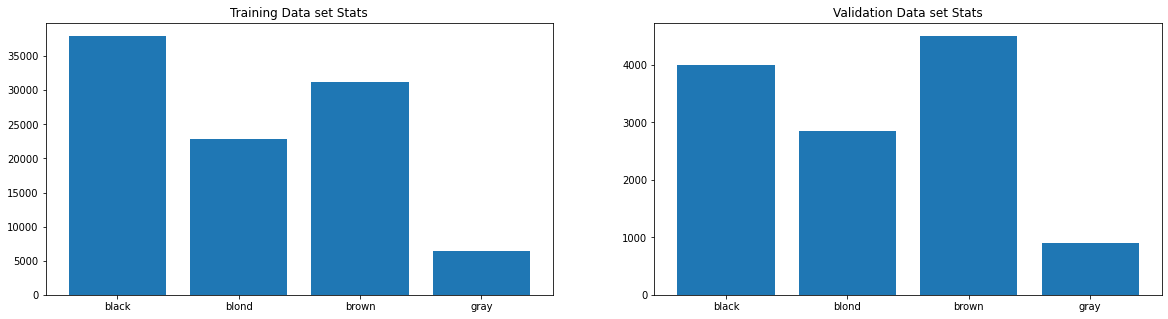

In [0]:
fig,sub=plt.subplots(1,2,figsize=(20,5))
train_stats=[len(labels_train[labels_train==0]),len(labels_train[labels_train==1]),len(labels_train[labels_train==2]),len(labels_train[labels_train==3])]
test_stats=[len(labels_val[labels_val==0]),len(labels_val[labels_val==1]),len(labels_val[labels_val==2]),len(labels_val[labels_val==3])]
sub[0].bar(hair_colours,train_stats)
sub[0].set_title('Training Data set Stats')
sub[1].bar(hair_colours,test_stats)
sub[1].set_title('Validation Data set Stats')

# **Observation**

*   The Distribution of the classes in the Training Dataset is similar to the distribution of the classes in the validation Dataset which indicates that we may expect similar kind of results on the validation Dataset as we get on the Training Dataset.



### **Data Visualisation**

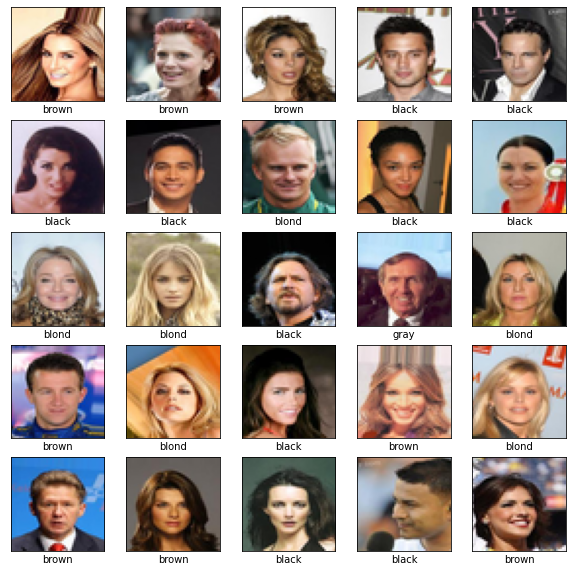

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images_train[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(hair_colours[labels_train[i]])
plt.show()

# **Conventional ML Implentation**

## **KNeighborsClassifier**

In [0]:
#FLATTENING DATA
x_train=images_train.flatten().reshape(98479,48*48*3)
x_test=images_val.flatten().reshape(12270,48*48*3)

In [0]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,labels_train)
train_knn=knn.score(x_train,labels_train)
knn_score=knn.score(x_test,labels_val)
print("Accuracy of KNN : {}".format(knn_score)) # accuracy of test or validation data

Accuracy of KNN : 0.6416462917685412


**Observations**

*   The model built in Knn  with the neighbors performs poorly on the validation Dataset as the Data is very High Dimensional and it requiures a lot of space which affects the performance of the model.  
*   This model is not useful as it has lot of sapce and time complexity.



**Random Forests**

In [0]:
rforest = RandomForestClassifier(n_estimators=100,max_depth=None, random_state=0)
rforest.fit(x_train,labels_train)
train_rforest=rforest.score(x_train,labels_train)
rforest_score=rforest.score(x_test,labels_val)
print("Accuracy of Random Forest : {}".format(rforest_score))# accuracy of test or validation data

Accuracy of Random Forest : 0.7969845150774246


## **Model 1- MLP Classifier implementation on Public test data**

In [0]:
mod=MLPClassifier(hidden_layer_sizes=(64,128,256,512,128), activation='relu', solver='adam', alpha=0.0001, batch_size='auto')
mod.fit(x_train,labels_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(64, 128, 256, 512, 128),
              learning_rate='constant', learning_rate_init=0.001, max_fun=15000,
              max_iter=200, momentum=0.9, n_iter_no_change=10,
              nesterovs_momentum=True, power_t=0.5, random_state=None,
              shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
              verbose=False, warm_start=False)

In [0]:
train_mod_score=mod.score(x_train,labels_train)
mod_score=mod.score(x_test,labels_val)
print(mod_score)# accuracy of test or validation data

0.84


Note: Since the accuracy of MLP classifier is better than other conventional ML algorithms. I have used it to predict the labels  of public dataset

### **Model 1 implementation on Public test data**

In [0]:
# I HAVE UPLOADED THE PUBLIC DATA SET IN MY DRIVE AND THEN USED TO PREDICT DATA
data=pd.read_csv('/content/drive/My Drive/ml_proj/image_test_public_sample.csv')
data.Prediction=mod.predict(test_public)
data.to_csv('/content/drive/My Drive/ml_proj/image_test_public_sample.csv',index= False)

In [0]:
data.head()

,ID,Prediction
0,182639.jpg,0
1,182640.jpg,1
2,182642.jpg,0
3,182643.jpg,0
4,182644.jpg,0


# **Deep Learning - Implementation**

In [0]:
categories=len(set(labels_train))
y_train=keras.utils.to_categorical(labels_train,num_classes=categories)
y_val=keras.utils.to_categorical(labels_val,num_classes=categories)

## **Model 2 - Convolutional Neural networks- from scratch**

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(48, 48, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(AveragePooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform',padding='same'))
model.add(BatchNormalization())
model.add(AveragePooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform',padding='same'))
model.add(BatchNormalization())
model.add(AveragePooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform',padding='same'))
model.add(BatchNormalization())
model.add(AveragePooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(keras.layers.GlobalAveragePooling2D())
#model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
average_pooling2d_1 (Average (None, 24, 24, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)       

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
stats=model.fit(images_train, y_train, batch_size=64,epochs=15,validation_data=(images_val, y_val))

Train on 98479 samples, validate on 12270 samples
Epoch 1/15
98479/98479 [==============================] - 50s 507us/step - loss: 0.4578 - accuracy: 0.8304 - val_loss: 0.3623 - val_accuracy: 0.8681
Epoch 2/15
98479/98479 [==============================] - 42s 428us/step - loss: 0.3162 - accuracy: 0.8829 - val_loss: 0.3251 - val_accuracy: 0.8843
Epoch 3/15
98479/98479 [==============================] - 42s 427us/step - loss: 0.2776 - accuracy: 0.8973 - val_loss: 0.3306 - val_accuracy: 0.8806
Epoch 4/15
98479/98479 [==============================] - 42s 428us/step - loss: 0.2591 - accuracy: 0.9046 - val_loss: 0.2508 - val_accuracy: 0.9068
Epoch 5/15
98479/98479 [==============================] - 42s 428us/step - loss: 0.2469 - accuracy: 0.9077 - val_loss: 0.2788 - val_accuracy: 0.8968
Epoch 6/15
98479/98479 [==============================] - 42s 428us/step - loss: 0.2359 - accuracy: 0.9133 - val_loss: 0.2978 - val_accuracy: 0.8903
Epoch 7/15
98479/98479 [==============================] 

### **Convolution visualisation- side bar**

In [0]:
z,p=[],[0,2,6,8,12,14,18]
for i in p:
  z.append(model.layers[i].output)
model2=keras.Model(model.input,z)
vis=model.predict(images_train[0][np.newaxis,:,:,:])

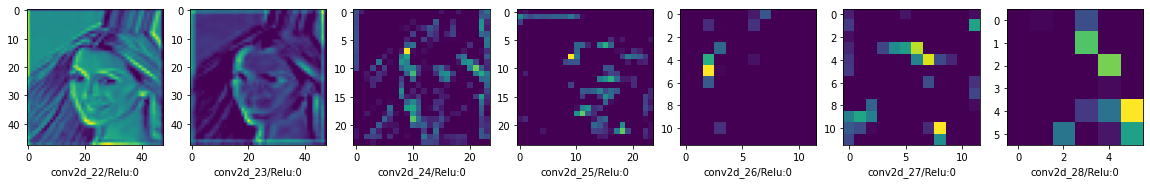

In [0]:
fig,sub=plt.subplots(1,7,figsize=(20,20))
for i in range(len(p)):
  sub[i].imshow(vis[i][0][:,:,0])
  sub[i].set_xlabel(z[i].name)

### **Statistics of CNN-from scratch**

In [0]:
_,train_deep_mod_score=model.evaluate(images_train,y_train)
_,deep_mod_score=model.evaluate(images_val,y_val)
(train_deep_mod_score,deep_mod_score)

12270/12270 [==============================] - 2s 190us/step


(0.9465368390083313, 0.9207009077072144)

In [0]:
print("Training Accuracy of Convolutional Neural networks : {}".format(train_deep_mod_score))
print("Test Accuracy of Convolutional Neural Networks : {}".format(deep_mod_score)) 

Training Accuracy of Convolutional Neural networks : 0.9465368390083313
Test Accuracy of Convolutional Neural Networks : 0.9207009077072144


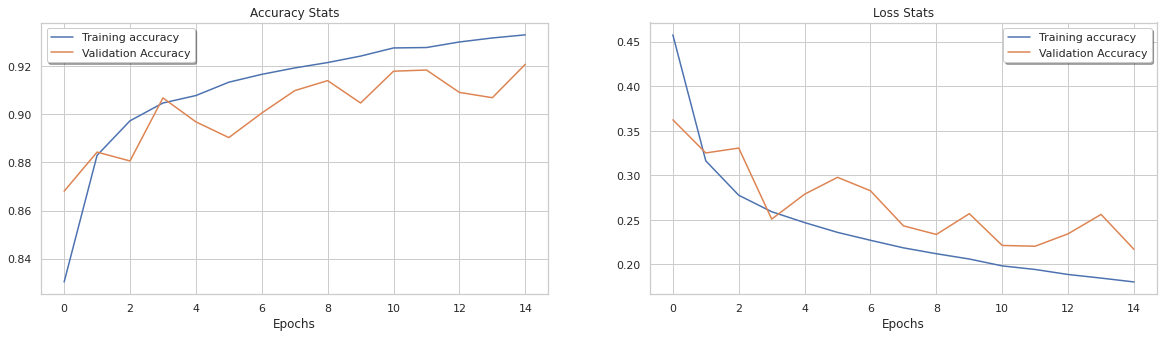

In [0]:
fig,sub=plt.subplots(1,2,figsize=(20,5))
sub[0].plot(stats.history['accuracy'])
sub[0].plot(stats.history['val_accuracy'])
sub[0].set_title("Accuracy Stats")
sub[0].set_xlabel("Epochs")
sub[0].legend(('Training accuracy', 'Validation Accuracy'), loc='upper left', shadow=True)
sub[1].plot(stats.history['loss'])
sub[1].plot(stats.history['val_loss'])
sub[1].set_title("Loss Stats")
sub[1].set_xlabel("Epochs")
sub[1].legend(('Training accuracy', 'Validation Accuracy'), loc='upper right', shadow=True)

### **Observation**:

- Observations like increase in training accuracy and decrease in loss value with epochs proves that model is learning well from the training instances. 
- Though the validation accuracy and validation loss fluctuates, increase in validation accuracy and decrease in loss value shows reflects a good impact of the model.
- There is only minor differences between training accuracy(94.6%) and test accuracy(92.07%) i.e only 2%. This clearly implicates that model did not overfit to training data.
- Adding Dropout layers to CNN model seems to be productive as it hindered the model from genralisation.

# **Predictiction of Model 2 on private data set**

In [0]:
# I HAVE UPLOADED THE PRIVATE DATA SET IN MY DRIVE AND THEN USED TO PREDICT DATA
data=pd.read_csv('/content/drive/My Drive/ml_proj/image_dataset/image_test_private_sample.csv')
data.head()

,ID,Prediction
0,Aaron_Eckhart_0001.jpg,0
1,Aaron_Guiel_0001.jpg,0
2,Aaron_Patterson_0001.jpg,0
3,Aaron_Peirsol_0001.jpg,0
4,Aaron_Peirsol_0002.jpg,0


In [0]:
data.Prediction=np.argmax(model.predict(x_test),axis=1)
data.to_csv('/content/drive/My Drive/ml_proj/image_dataset/image_test_private_sample.csv',index= False)

In [0]:
data.head()

,ID,Prediction
0,Aaron_Eckhart_0001.jpg,2
1,Aaron_Guiel_0001.jpg,2
2,Aaron_Patterson_0001.jpg,0
3,Aaron_Peirsol_0001.jpg,1
4,Aaron_Peirsol_0002.jpg,2


### **Implementation of Transfer learning**

In [0]:
class Model2(tf.keras.Model):
  def __init__(self):
    super(Model2, self).__init__()
    self.base_model=keras.applications.ResNet101V2(weights='imagenet',include_top=False,input_shape=(48,48,3))
    #self.base_model.summary()
    self.flat=keras.layers.GlobalAveragePooling2D()
    self.dense1=keras.layers.Dense(128,activation='relu')
    self.dense2=keras.layers.Dense(4,activation='softmax')
    for i in self.base_model.layers:    # freezing all the layers of resnet
      i.trainable=False
  def model_train(self):
    x=self.flat(self.base_model.output)
    y=self.dense1(x)
    out=self.dense2(y)
    #print(out)
    model=keras.Model(self.base_model.input,out) #using model api to appernd two dense trainable layers tp resnet
    #for i in model.layers[-(self.unfreeze)-2:-3]:
     # i.trainable=True
      #print(i.output)
    model.summary()
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    result=model.fit(images_train, np.array(y_train,dtype='float32'),batch_size=64,epochs=15,validation_data=(images_val, np.array(y_val,dtype='float32')))
    return(model,result)

In [0]:
res_mod=Model2()
model2,stats2=res_mod.model_train()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 48, 48, 3)    0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 54, 54, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 24, 24, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 26, 26, 64)   0           conv1_conv[0][0]                 
____________________________________________________________________________________________

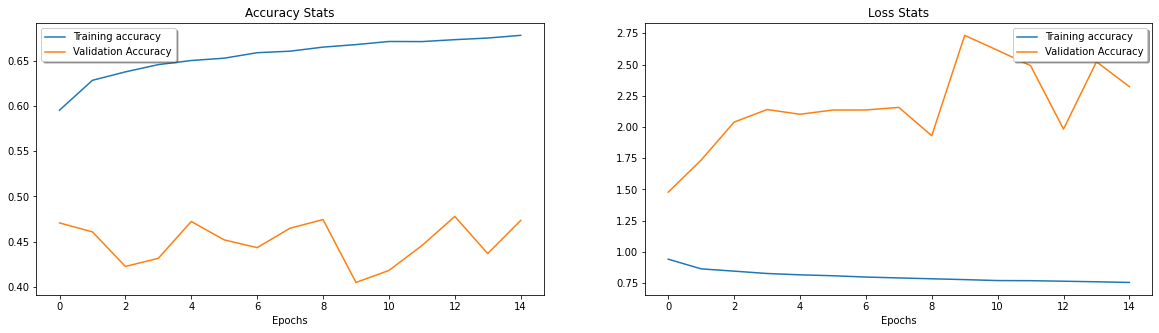

In [0]:
fig,sub=plt.subplots(1,2,figsize=(20,5))
sub[0].plot(stats2.history['accuracy'])
sub[0].plot(stats2.history['val_accuracy'])
sub[0].set_title("Accuracy Stats")
sub[0].set_xlabel("Epochs")
sub[0].legend(('Training accuracy', 'Validation Accuracy'), loc='upper left', shadow=True)
sub[1].plot(stats2.history['loss'])
sub[1].plot(stats2.history['val_loss'])
sub[1].set_title("Loss Stats")
sub[1].set_xlabel("Epochs")
sub[1].legend(('Training accuracy', 'Validation Accuracy'), loc='upper right', shadow=True)

## **CNN-from scratch vs Pretrained Resnet101**

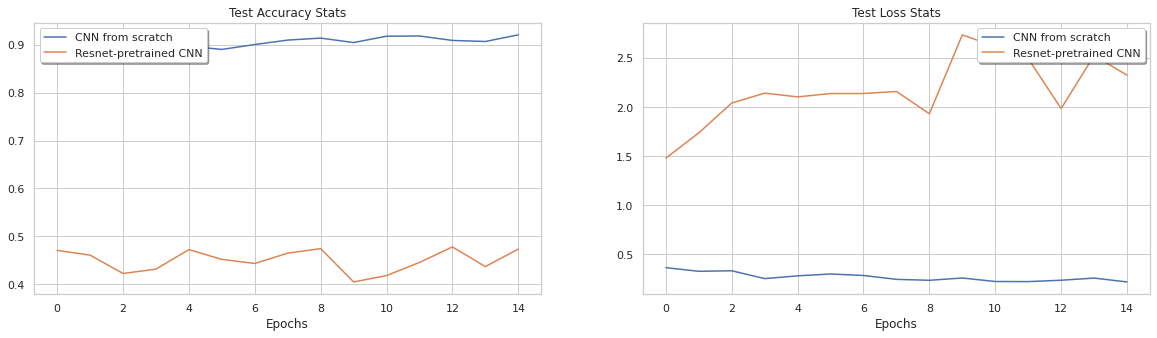

In [0]:
fig,sub=plt.subplots(1,2,figsize=(20,5))
sub[0].plot(stats.history['val_accuracy'])
sub[0].plot(stats2['val_accuracy'])
sub[0].set_title("Test Accuracy Stats")
sub[0].set_xlabel("Epochs")
sub[0].legend(('CNN from scratch', 'Resnet-pretrained CNN'), loc='upper left', shadow=True)
sub[1].plot(stats.history['val_loss'])
sub[1].plot(stats2['val_loss'])
sub[1].set_title("Test Loss Stats")
sub[1].set_xlabel("Epochs")
sub[1].legend(('CNN from scratch', 'Resnet-pretrained CNN'), loc='upper right', shadow=True)

**Observation:** On comparing the accuracies of both Model 2 and pretrained resnet we can infer that Model 2 is performing better than the model built by transfer learning. The following points support our conclusion:
- Training and validation accuracy of model 2 is higher than resnet model
- Both training and validation loss of model 2 is lower than resnet model

#**Further analysis- Deep learning vs Conventional implementations**

## **Convolutional layer + KNN** 

In [0]:
conv_mod=keras.Model(model.input,model.layers[22].output)
x_train=conv_mod.predict(images_train)
x_test=conv_mod.predict(images_val)

In [0]:
deep_knn = KNeighborsClassifier(n_neighbors=5)
deep_knn.fit(x_train,labels_train)
deep_knn_train=deep_knn.score(x_train,labels_train)
deep_knn_score=deep_knn.score(x_test,labels_val)
print("Training Accuracy of Convolutional driven KNN : {}".format(deep_knn_train)))
print("Test Accuracy of Convolutional driven KNN : {}".format(deep_knn_score)) 

Test Accuracy of Convolutional driven KNN : 0.9611998497141523
Accuracy of Convolutional driven KNN : 0.9237978810105949


Text(0.5, 1.0, 'Validation Stats')

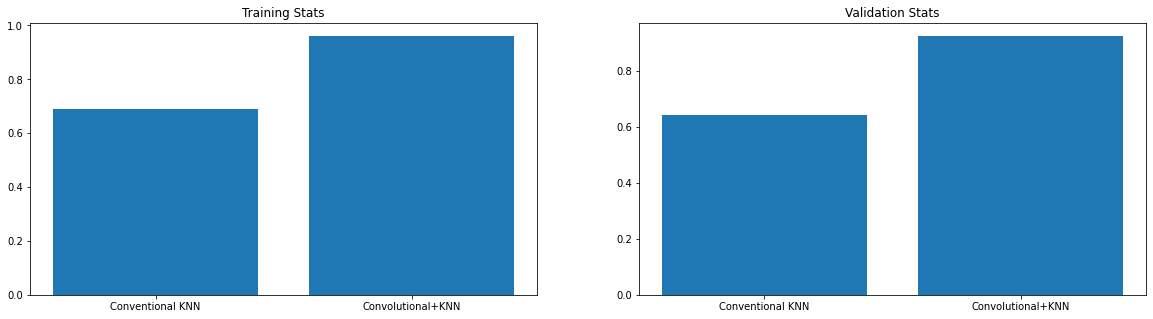

In [0]:
fig,sub=plt.subplots(1,2,figsize=(20,5))
sub[0].bar(['Conventional KNN','Convolutional+KNN'],[train_knn,deep_knn_train])
sub[0].set_title('Training Stats')
sub[1].bar(['Conventional KNN','Convolutional+KNN'],[knn_score,deep_knn_score])
sub[1].set_title('Validation Stats')

**Observation**: The KNN built on top of Convolutional network has higher accuracy than conventional knn. Moreover, Cnn-knn executes 10x faster than the normal implementations.

## Convolutional layer + RandomForest

In [0]:
deep_rforest = RandomForestClassifier(n_estimators=100,max_depth=None, random_state=0)
deep_rforest.fit(x_train,labels_train)
deep_rforest_train=deep_rforest.score(x_train,labels_train)
deep_rforest_score=deep_rforest.score(x_test,labels_val)
print("Training Accuracy of Convolutional driven Random Forests : {}".format(deep_rforest_train))
print("Test Accuracy of Convolutional driven Random Forest : {}".format(deep_rforest_score)) 

Training Accuracy of Convolutional driven Random Forests : 0.9999695366524843
Test Accuracy of Convolutional driven Random Forest : 0.9261613691931541


Text(0.5, 1.0, 'Validation Stats')

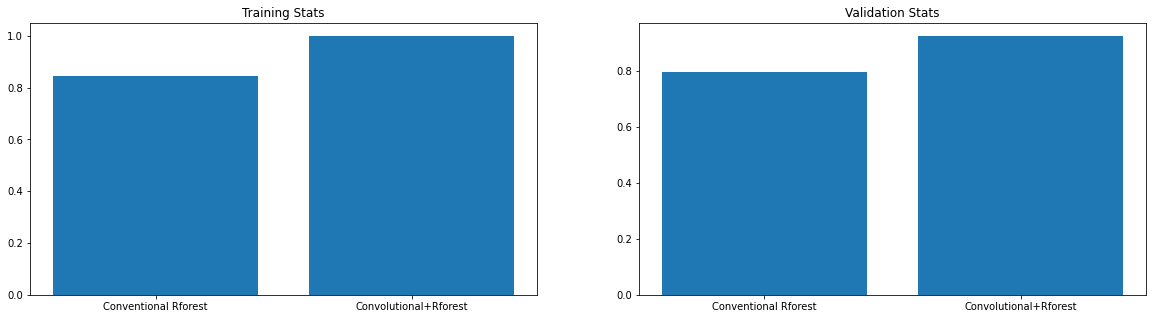

In [0]:
fig,sub=plt.subplots(1,2,figsize=(20,5))
sub[0].bar(['Conventional Rforest','Convolutional+Rforest'],[train_rforest,deep_rforest_train])
sub[0].set_title('Training Stats')
sub[1].bar(['Conventional Rforest','Convolutional+Rforest'],[rforest_score,deep_rforest_score])
sub[1].set_title('Validation Stats')

# Conventional implementations vs Deep Learning implementations

In [0]:
import seaborn as sns
sns.set(style="whitegrid")
deep_rforest_train= 0.9999695366524843

### **Training(validation) statistics**

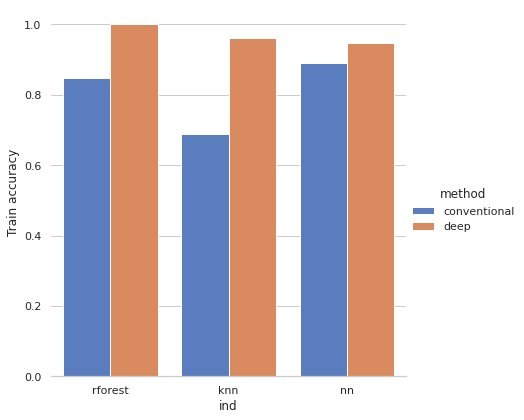

In [0]:
train_stats={'accuracy':[train_rforest,deep_rforest_train,train_knn,deep_knn_train,train_mod_score,train_deep_mod_score],'method':['conventional','deep']*3,'ind':['rforest','rforest','knn','knn','nn','nn']}
train_stats=pd.DataFrame(train_stats)
g = sns.catplot(x='ind', y='accuracy', hue='method',height=6, kind="bar", palette="muted",data=train_stats)
g.despine(left=True)
g.set_ylabels("Train accuracy")

The training statistics of models (including both conventional and deep learning implementations) are presented by the above clustered bar chart. From the above graph we can infer following statements:


*   In case of Random forest model ,the deeplearning model accuracy of training dataset is higher that of conventional methods. Not only Random Forest, other deep learning implementations of knn and nn(neural networks i.e CNN deep implementation) training accuracy is higher than the conventional methods.
*   Apart from accuracy metrics, considering other factors like time and memory efficiency. The deep Learning version of the following models seems to perform more efficiently than the conventional methods.



### **Test statistics**

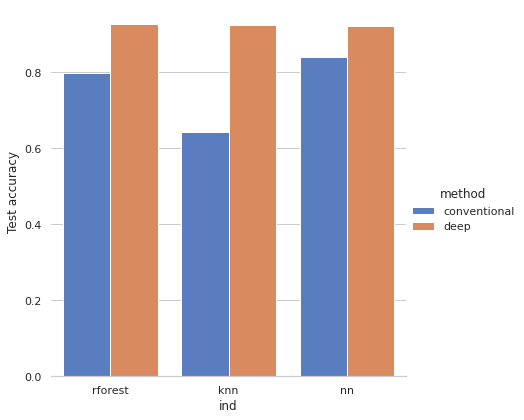

In [0]:
test_stats={'accuracy':[rforest_score,deep_rforest_score,knn_score,deep_knn_score,mod_score,deep_mod_score],'method':['conventional','deep']*3,'ind':['rforest','rforest','knn','knn','nn','nn']}
test_stats=pd.DataFrame(test_stats)
g = sns.catplot(x='ind', y='accuracy', hue='method',height=6, kind="bar", palette="muted",data=test_stats)
g.despine(left=True)
g.set_ylabels("Test accuracy")

The teststatistics of models (including both conventional and deep learning implementations) are presented by the above clustered bar chart. From the above graph we can infer following statements:



*   The accuracy of KNearest classifier(built on top of Convolutions) seems to perform better than the conventional methods. 
*   By using convolutions on top of conventional implementations we are capturing both contextual and conceptual features in an efficient way. The convolutions reduce the feature space and thereby reduces the complexity of model. Lower feature set demands less resources and promotes faster execution.
*
Conventional methods feature sets length - 48x48x3=6912     Deep learning feature sets length -128



*   Due to more number of features in traditional implementation, the conventional knn takes 6 hrs(approx) of execution time while cnn driven knn takes only 22 minutes.


### **Conclusion:** From The above simulations of Model 1(i.e MLP classifier used to predict labels of public test data) and Model 2(CNN used to predict labels of private test data) it is clear that deep learning implementations i,e model2 performs better than conventional ML techniquesi.e model1. The above implementations shows that conventional methods which are run on top of Convolutions are highly efficient in terms of evaluation metrics(accuracy, loss), time and memory consumption compared to conventional implementations.

- Conventional machine learning algorithms like MLP classifier, random forests requires extra computation time and space for feature engineering=> dimentionality reduction techniques(like PCA, LDA) and Feature selection techniques to reduce the feature space.Where as Deep learning models has ability to perform automatic feature extraction from raw data. 
- Dimensionality reduction techniques results in loss of valuable information whereas the convolution operations extracts important relevant conceptual and contextual features. 